# Python preprocess

In [1]:
import matplotlib.pyplot as plt
import librosa as libra
import numpy as np
import librosa.display
import math

/home/manoj/anaconda3/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/manoj/anaconda3/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


# Load the data and extract sampling rate and data points

In [2]:
y, sr = libra.load("mixture_devtest_glassbreak_290_3d4723b9f2f2491d8a86448b9ead032c.wav")

# Generate the melspcetrogram data points

In [4]:
mels = libra.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000, hop_length=510,win_length=2048)
print(mels.shape)
print(mels)

(128, 1298)
[[4.8505734e-03 3.5698428e-03 1.1867790e-03 ... 6.3231832e-04
  5.2078743e-04 5.9914333e-04]
 [1.3874983e-03 2.3527867e-03 9.4323105e-04 ... 1.0694532e-03
  9.4422279e-04 1.7876275e-03]
 [1.7877012e-02 6.9964933e-03 2.4497998e-03 ... 2.1755232e-03
  1.9446572e-03 1.5392615e-03]
 ...
 [1.9136495e-07 1.5709588e-07 1.3961325e-07 ... 1.4107847e-07
  3.9238330e-07 8.5965178e-07]
 [1.2194715e-07 1.0369012e-07 9.6944625e-08 ... 2.3343927e-07
  8.0536728e-07 1.4734567e-06]
 [1.1566541e-07 1.2854807e-07 1.2933928e-07 ... 2.4722175e-07
  6.7425680e-07 8.6908244e-07]]


# Plot the spectrogram after converting them to power_to_db 

(128, 1298)


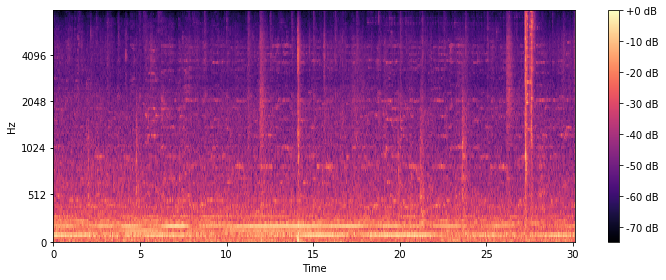

In [6]:
plt.figure(figsize=(10, 4))
S_dB = libra.power_to_db(mels, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='mel', sr=sr,
                          fmax=8000)
print(S_dB.shape)
plt.colorbar(format='%+2.0f dB')
# plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.savefig("baby_cry.png")
plt.show()

# Normalise the data by subtracting from mean and dividng by standard deviations

In [17]:
mels_new = np.log(mels + 1e-9)
mels_new -= np.mean(mels_new)
mels_new /= np.std(mels_new)

(128, 2)


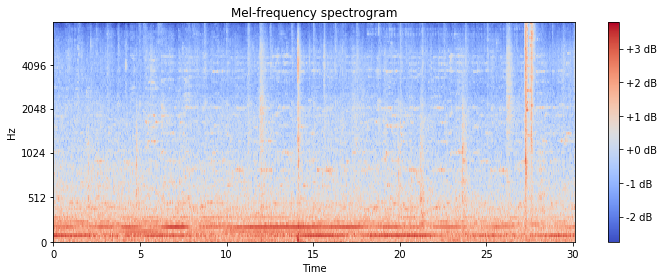

In [19]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mels_new, x_axis='time',
                          y_axis='mel', sr=sr,
                          fmax=8000)
print(S_dB.shape)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.savefig("baby_cry.png")
plt.show()

# Apply window of 46ms with half overallping

In [15]:
windows = []

for frame_idx in range(2,1298,1):

        window = mels[:,frame_idx-2:frame_idx]
        
        window = np.log(window + 1e-9)
        window -= np.mean(window)
        window /= np.std(window)

        windows.append(window)
windows = np.asarray(windows)
print(windows[0])

[[ 2.27487421e+00  2.15915847e+00]
 [ 1.80246496e+00  2.00179338e+00]
 [ 2.76722169e+00  2.41313720e+00]
 [ 3.08271670e+00  2.89788818e+00]
 [ 2.38400602e+00  2.69142151e+00]
 [ 1.82988942e+00  1.90315354e+00]
 [ 2.29307628e+00  2.17826414e+00]
 [ 2.30265546e+00  2.24230170e+00]
 [ 2.39265966e+00  2.41831493e+00]
 [ 1.55207491e+00  1.86709559e+00]
 [ 1.97058296e+00  2.17290211e+00]
 [ 1.52949619e+00  1.77274740e+00]
 [ 1.24082410e+00  1.39031088e+00]
 [ 8.98794949e-01  1.00986326e+00]
 [ 1.30065918e+00  1.16862607e+00]
 [ 1.28671908e+00  1.17742884e+00]
 [ 2.33062595e-01  4.57036197e-01]
 [ 1.51460147e+00  1.49713099e+00]
 [ 1.64008963e+00  1.38070929e+00]
 [ 1.02102602e+00  1.05199158e+00]
 [ 7.48617589e-01  7.91855335e-01]
 [-6.81515157e-01  2.37328127e-01]
 [ 5.81656694e-02  9.73448604e-02]
 [ 1.28653491e+00  1.06951702e+00]
 [ 1.13054109e+00  9.94608879e-01]
 [ 2.90159911e-01  6.02462053e-01]
 [ 1.14189506e+00  8.41650844e-01]
 [ 1.17297041e+00  7.25648820e-01]
 [ 7.85185635e-01  4

# Plotting the first 46ms frame sample

(128, 2)


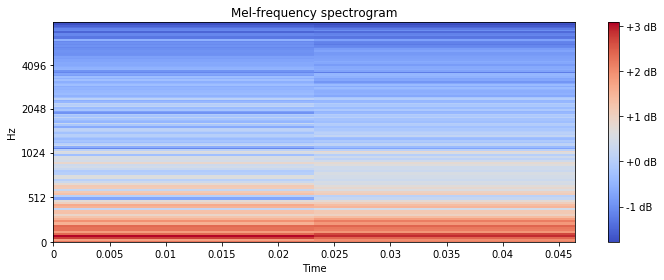

In [24]:
plt.figure(figsize=(10, 4))
# S_dB = libra.power_to_db(windows[0], ref=np.max)
librosa.display.specshow(windows[0], x_axis="time",
                          y_axis='mel', sr=sr,
                          fmax=8000)
print(S_dB.shape)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

# Save the data file as npy files

In [25]:
np.save("baby_cry.npy", windows)

In [ ]:
# 